# Cuantización en Procesamiento de Imágenes

###La cuantización reduce el número de niveles de gris en una imagen.

Importamos las librerias necesarias para el Laboratorio:

* NumPy para trabajar con matrices
* OpenCV (cv2) para procesar las imágenes
* Matplotlib para poder visualizar las imágenes

In [1]:
# Preparación del entorno
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [2]:
#Elegimos una imagen y la cargamos para trabajar con la misma
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/15004.jpg

--2025-04-18 20:45:24--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/15004.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34720 (34K) [image/jpeg]
Saving to: ‘15004.jpg’

15004.jpg           100%[===================>]  33.91K  --.-KB/s    in 0.02s   

2025-04-18 20:45:24 (1.73 MB/s) - ‘15004.jpg’ saved [34720/34720]



## Visualización y análisis de la imagen original

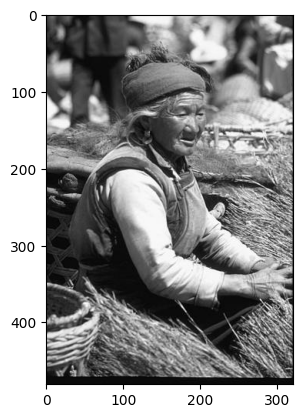

In [3]:
#Leemos la imagen seleccionada utilizando metodo imread de libreria cv2 y la asignamos a variable "img"
img = imread('15004.jpg')
plt.imshow(img)
plt.show()

In [4]:
#Se define función para obenter información de la imagen
def info_img(img):
    print('Tamaño =', img.shape)     # Dimensiones de la matriz
    print('Máximo =', np.max(img))   # Valor más alto (más blanco)
    print('Mínimo =', np.min(img))   # Valor más bajo (más negro)
#Se ejecuta función
info_img(img)

Tamaño = (481, 321, 3)
Máximo = 255
Mínimo = 0


In [5]:
#Vamos a realizar una copia de la imagen seleccionada y la asignamos a variable "X" para luego utilizar un solo canal
X = img.copy()
# Vamos a utilizar solo el primer canal de la imagen (rojo)
X = X[:,:,0]

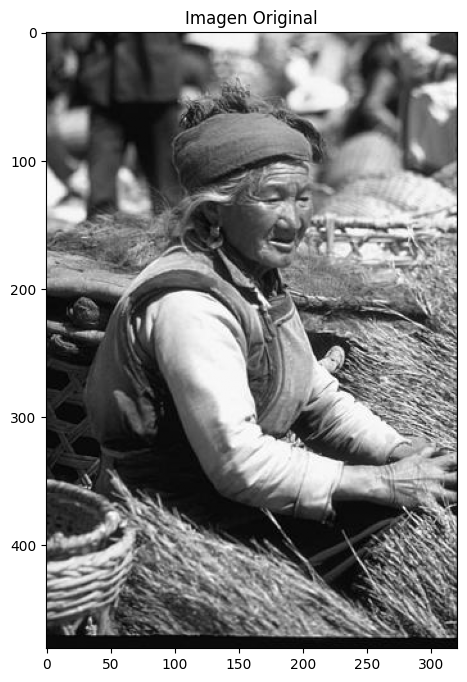

Tamaño = (481, 321)
Máximo = 255
Mínimo = 0


In [6]:
# Mostramos la imagen original en un tamaño especifico y en escala de grises
plt.figure(figsize=(8,8))
plt.imshow(X, cmap='gray')
plt.title('Imagen Original')
plt.show()
info_img(X)

## Cuantizacion
### Para llevar a cabo el proceso de reducción de profundidad de niveles (reducción de niveles de grises), vamos a aplicar distintos factores de cuantización e identificar a partir de que factor se puede identificar un alto nivel de posterización.

In [12]:
#Aplicamos un factor de cuantización "qa" para asignarlos a la imagen "Za" y observar los cambios
qa = 32                 # Factor de cuantización
Za = np.floor(X/qa)*qa     # Divide por qa, redondea hacia abajo y multiplica por qa
Za = Za.astype(np.uint8)   # Convierte a enteros 0-255

In [13]:
#Repetimos el mismo proceso pero para otro factor de cuantizacion "qb" que asignaremos a la imagen "Zb"
qb = 64
Zb = np.floor(X/qb)*qb
Zb = Zb.astype(np.uint8)

In [14]:
#Repetimos el mismo proceso pero para otro factor de cuantizacion "qc" que asignaremos a la imagen "Zc"
qc = 128
Zc = np.floor(X/qc)*qc
Zc = Zc.astype(np.uint8)

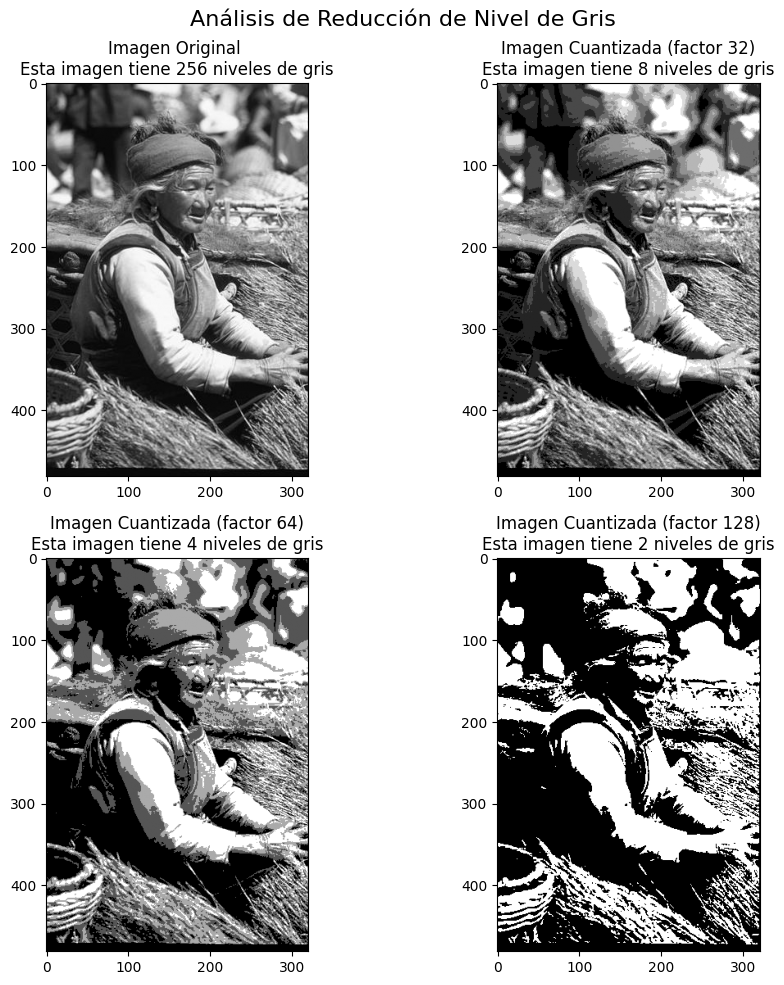

In [15]:
#Vamos a mostrar la imagen original y las imagenes creadas con los distintos factores para apreciar los cambios
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Análisis de Reducción de Nivel de Gris', fontsize=16)

# Imagen Original
axes[0,0].imshow(X, cmap='gray')
axes[0,0].set_title('Imagen Original \n' f'Esta imagen tiene 256 niveles de gris')

# Imagen Cuantizada A - Factor 32
axes[0,1].imshow(Za, cmap='gray')
axes[0,1].set_title(f'Imagen Cuantizada (factor {qa})\n' f'Esta imagen tiene {int(256/qa)} niveles de gris')


# Imagen Cuantizada B - Factor 64
axes[1,0].imshow(Zb, cmap='gray')
axes[1,0].set_title(f'Imagen Cuantizada (factor {qb})\n' f'Esta imagen tiene {int(256/qb)} niveles de gris')


# Imagen Cuantizada C - Factor 128
axes[1,1].imshow(Zc, cmap='gray')
axes[1,1].set_title(f'Imagen Cuantizada (factor {qc})\n' f'Esta imagen tiene {int(256/qc)} niveles de gris')


plt.tight_layout()
plt.show()

## Histogramas

Vamos a configurar y mostrar los histogramas de la imagen original y de las imagenes donde se aplicó la cuantización y poder observar la distribución de los niveles de gris en cada una de las imagenes.

In [16]:
#definimos ciclo para la configuración del histograma
def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

VISUALIZACIÓN DE HISTOGRAMAS

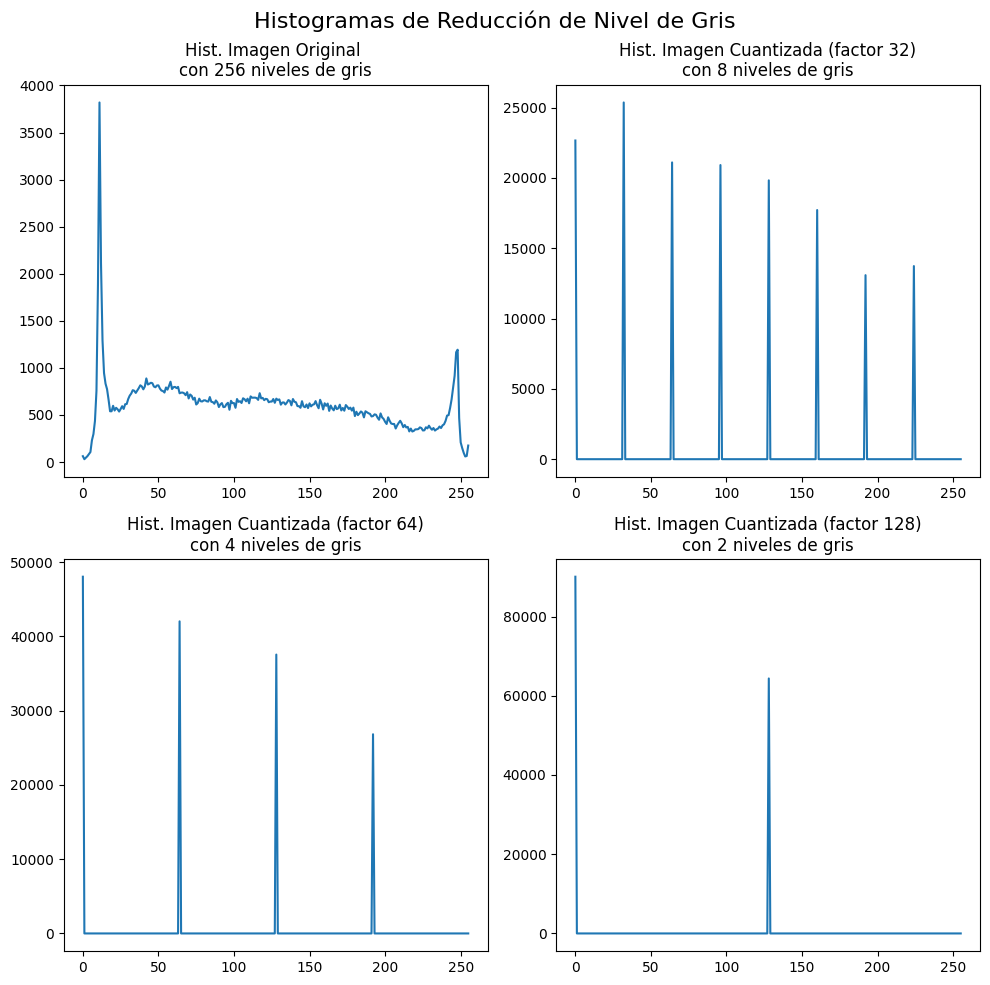

In [17]:
#Vamos a mostrar el histograma de la imagen original y las imagenes creadas para apreciar los cambios
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Histogramas de Reducción de Nivel de Gris', fontsize=16)

# Imagen Original
axes[0,0].plot(hist(X))
axes[0,0].set_title('Hist. Imagen Original \n' f'con 256 niveles de gris')

# Imagen Cuantizada A - Factor 4
axes[0,1].plot(hist(Za))
axes[0,1].set_title(f'Hist. Imagen Cuantizada (factor {qa})\n' f'con {int(256/qa)} niveles de gris')


# Imagen Cuantizada B - Factor 16
axes[1,0].plot(hist(Zb))
axes[1,0].set_title(f'Hist. Imagen Cuantizada (factor {qb})\n' f'con {int(256/qb)} niveles de gris')


# Imagen Cuantizada C - Factor 32
axes[1,1].plot(hist(Zc))
axes[1,1].set_title(f'Hist. Imagen Cuantizada (factor {qc})\n' f'con {int(256/qc)} niveles de gris')


plt.tight_layout()
plt.show()

###Al experimentar con diferentes valores del factor_cuantizacion (32, 64, 128, etc.) observamos que en las distintas pruebas llevadas a cabo se aprecia una reducción de niveles de grises en comparación a la imagen original utilizada. En cuanto a los histogramas se observan cada vez que aumenta el factor de cuantizacion, menos picos. Por último se observa que mientras mayor es el factor de cuantización, más notorio es el efecto en la reducción de niveles de grises en cada imagen.